In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm

In [2]:
twenty_year = pd.read_csv('ign.csv', encoding = "ISO-8859-1")
twenty_year.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [7]:
vg_sales3 = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv').reset_index()
vg_sales3.head()

,index,4,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#두 자료 merge
merge1 = pd.merge(twenty_year, vg_sales3, left_on=['title', 'platform'], right_on=['4', 'Platform'])
del merge1['Unnamed: 0'] #merge 결과로 이상한 컬럼이 생겨서 이것을 삭제했습니다.
del merge1['url'] #url컬럼은 딱히 필요없을 것 같아서 우선 삭제했습니다.

merge_columns = merge1.columns.tolist()

column_order = ['index', 'Year_of_Release','title', '4', 'genre', 'Genre', 'platform', 'Platform', 'score', 'score_phrase', 
                'editors_choice', 'release_year', 'release_month', 'release_day', 'Publisher',
                'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count'] #데이터프레임의 출력될 column의 순서

merge_result = merge1[column_order]
#merge_result = pd.DataFrame(merge_result.sort_values(by = 'Rank', ascending=True))
#merge_result = merge_result.set_index('Rank')
merge_result

,index,Year_of_Release,title,4,genre,Genre,platform,Platform,score,score_phrase,...,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,3061,2012,NHL 13,NHL 13,Sports,Sports,Xbox 360,Xbox 360,8.5,Great,...,Electronic Arts,0.51,0.10,0.00,0.05,0.66,83.0,44.0,6.6,86.0
1,3166,2012,NHL 13,NHL 13,Sports,Sports,PlayStation 3,PlayStation 3,8.5,Great,...,Electronic Arts,0.33,0.21,0.00,0.09,0.64,84.0,22.0,6.8,60.0
2,688,2012,Guild Wars 2,Guild Wars 2,RPG,Action,PC,PC,9.0,Amazing,...,NCSoft,0.96,1.07,0.00,0.27,2.31,90.0,69.0,7.9,2954.0
3,2440,2012,Tekken Tag Tournament 2,Tekken Tag Tournament 2,Fighting,Fighting,PlayStation 3,PlayStation 3,7.5,Good,...,Namco Bandai Games,0.28,0.31,0.13,0.13,0.85,82.0,50.0,8.2,193.0
4,5359,2012,Tekken Tag Tournament 2,Tekken Tag Tournament 2,Fighting,Fighting,Xbox 360,Xbox 360,7.5,Good,...,Namco Bandai Games,0.19,0.11,0.01,0.03,0.34,83.0,35.0,7.5,90.0
5,7715,2011,Way of the Samurai 4,Way of the Samurai 4,"Action, Adventure",Action,PlayStation 3,PlayStation 3,5.5,Mediocre,...,Nippon Ichi Software,0.00,0.03,0.16,0.01,0.19,58.0,25.0,6.5,15.0
6,14040,2012,Legasista,Legasista,"Action, RPG",Role-Playing,PlayStation 3,PlayStation 3,6.5,Okay,...,Nippon Ichi Software,0.00,0.00,0.04,0.00,0.04,68.0,13.0,6.3,15.0
7,959,2012,World of Warcraft: Mists of Pandaria,World of Warcraft: Mists of Pandaria,RPG,Role-Playing,PC,PC,8.7,Great,...,Activision,0.84,0.76,0.00,0.22,1.82,82.0,42.0,4.8,1265.0
8,449,2012,Resident Evil 6,Resident Evil 6,"Action, Adventure",Shooter,PlayStation 3,PlayStation 3,7.9,Good,...,Capcom,0.88,0.94,0.88,0.40,3.10,74.0,34.0,5.4,1304.0
9,874,2012,Resident Evil 6,Resident Evil 6,"Action, Adventure",Shooter,Xbox 360,Xbox 360,7.9,Good,...,Capcom,1.12,0.60,0.07,0.16,1.95,67.0,71.0,5,1407.0


In [10]:
grouped = merge_result.groupby('Genre').size().sort_values(ascending=False)
genres = list(grouped.index)
genres

['Action',
 'Sports',
 'Shooter',
 'Racing',
 'Role-Playing',
 'Platform',
 'Misc',
 'Fighting',
 'Simulation',
 'Strategy',
 'Adventure',
 'Puzzle']

In [12]:
gny = merge_result.filter(['Genre', 'Year_of_Release'], axis=1).dropna()
pd.options.display.float_format = '{:,.0f}'.format
gny= gny.sort_values(by='Year_of_Release')
gny.reset_index()
gny = gny[26:]
gny

,Genre,Year_of_Release
143,Fighting,1994
125,Adventure,1994
124,Adventure,1994
169,Sports,1994
116,Sports,1994
137,Shooter,1995
126,Fighting,1995
168,Fighting,1995
119,Simulation,1995
127,Simulation,1995


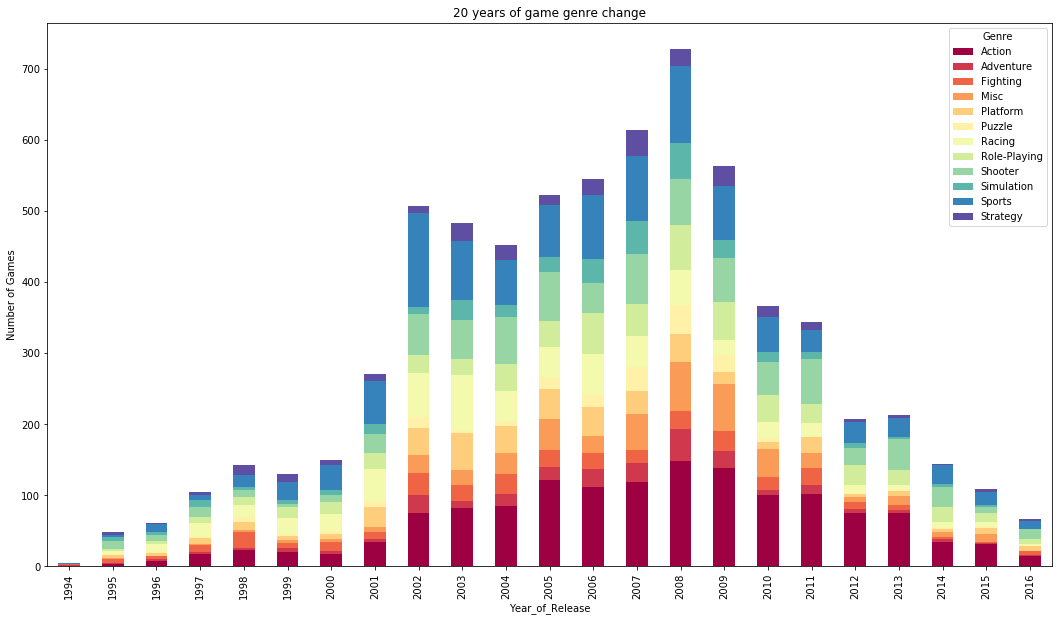

In [14]:
data = pd.DataFrame(gny.groupby(['Year_of_Release', 'Genre']).size())
data = data.rename(columns={0: 'N'})
data = data.reset_index()

result = pd.pivot_table(data, values='N', index='Year_of_Release', columns='Genre').fillna(0)
cmap = cm.get_cmap('Spectral')
result.plot.bar(stacked=True,cmap=cmap, figsize=(18,10))
plt.ylabel('Number of Games')
plt.title('20 years of game genre change')